# Decision Tree Algorithm

## Overview
- **Decision Tree** is a **Supervised learning technique** that can be used for both **classification** and **regression** problems, but mostly it is preferred for solving **classification** problems.
- It is a **tree-structured classifier**, where:
  - **Internal nodes** represent the features of a dataset.
  - **Branches** represent the decision rules.
  - **Each leaf node** represents the outcome.

## Nodes in a Decision Tree
- **Decision Node**: Used to make decisions and has multiple branches.
- **Leaf Node**: Represents the output of decisions and does not contain further branches.

## Decision Making
- Decisions or tests are performed based on the features of the given dataset.
- It is a **graphical representation** for getting all possible solutions to a problem/decision based on given conditions.
- The tree starts with the **root node**, which expands into further branches, constructing a tree-like structure.

## CART Algorithm
- To build a tree, we use the **CART algorithm** (Classification and Regression Tree algorithm).
- A decision tree asks a question and, based on the answer (Yes/No), splits the tree into subtrees.

## Why Use Decision Trees?
- **Human-like Decision Making**: Decision trees mimic human thinking, making them easy to understand.
- **Transparent Logic**: The tree-like structure makes the logic behind decisions easy to understand.

## Decision Tree Terminologies
- **Root Node**: The starting point of the decision tree, representing the entire dataset.
- **Leaf Node**: The final output node; no further segregation is possible.
- **Splitting**: Dividing the decision node/root node into sub-nodes based on given conditions.
- **Branch/Sub Tree**: A tree formed by splitting the main tree.
- **Pruning**: Removing unwanted branches from the tree.
- **Parent/Child Node**: The root node is the parent node, and other nodes are child nodes.

## How Does the Decision Tree Algorithm Work?
1. **Step-1**: Begin with the root node (S), which contains the complete dataset.
2. **Step-2**: Find the best attribute using **Attribute Selection Measure (ASM)**.
3. **Step-3**: Divide S into subsets containing possible values for the best attributes.
4. **Step-4**: Generate the decision tree node containing the best attribute.
5. **Step-5**: Recursively create new decision trees using the subsets. Continue until no further classification is possible, and the final node is called a leaf node.

### Example: Deciding What to Wear Based on Weather
1. **Start at the root node**: Check the weather.
   - **Is it raining?**
     - **Yes**:
       - **Do you have a raincoat?**
         - **Yes**: Wear your raincoat.
         - **No**: Take an umbrella.
     - **No**:
       - **Is it cold?**
         - **Yes**: Wear a jacket.
         - **No**: Wear light, comfortable clothing.

## When to Use Decision Trees
- **Interpretability**: Easy to understand and visualize.
- **Mixed Data**: Data contains both categorical and numerical features.
- **Non-linear Relationships**: Features and target have non-linear relationships.
- **Handling Missing Values**: Decision trees can handle missing values.
- **Outliers**: Minimal impact of outliers on the model.
- **Classification and Regression**: Suitable for both tasks.
- **Automatic Feature Selection**: Desired in the model.
- **Small to Medium-sized Datasets**: Ideal for such datasets.

## Pre-requisites for Decision Tree Algorithm
1. **Well-structured Dataset**: Should not have missing values.
2. **Relevant Features**: Works best with relevant features.
3. **Classification Problem**: Target variable should have categorical or binary outcomes.
4. **Regression Problem**: Target variable should be continuous.
5. **High Dimensional Data**: Preprocessing or ensemble methods may be required.

## Attribute Selection Measures
- **Attribute Selection Measure (ASM)**: Technique to select the best attribute for nodes.
- **Popular Techniques**:
  - **Information Gain**
  - **Gini Index**

### 1. Entropy
- **What It Measures**: Entropy measures the uncertainty or randomness in the dataset.
- **Role in Decision Trees**: Used to calculate Information Gain. The goal is to reduce entropy by splitting the data, creating purer subsets.

### 2. Information Gain
- **What It Measures**: Information Gain (IG) measures the reduction in entropy after a dataset is split on a feature.
- **Role in Decision Trees**: Used to choose the feature that provides the maximum reduction in entropy. Higher IG indicates a better split.

### 3. Gini Impurity
- **What It Measures**: Gini Impurity measures the probability of misclassification if we randomly assign a label to an item in the dataset.
- **Role in Decision Trees**: Used in CART to determine the best feature to split the data. The algorithm selects the feature that minimizes Gini Impurity.

## Pruning: Getting an Optimal Decision Tree
- **Pruning**: Process of deleting unnecessary nodes to get the optimal decision tree.
- **Purpose**: A too-large tree increases the risk of overfitting, while a small tree may not capture all important features.
- **Types of Pruning**:
  - **Cost Complexity Pruning**
  - **Reduced Error Pruning**

## Advantages of Decision Trees
- **Simplicity**: Easy to understand, mimicking human decision-making.
- **Usefulness**: Effective for solving decision-related problems.
- **Outcome Analysis**: Helps in considering all possible outcomes for a problem.
- **Data Cleaning**: Requires less data cleaning compared to other algorithms.

## Disadvantages of Decision Trees
- **Complexity**: Contains many layers, making it complex.
- **Overfitting**: May have overfitting issues, which can be resolved using the **Random Forest algorithm**.
- **Computational Complexity**: Increases with more class labels.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
survived,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0


In [5]:
df.drop('deck',axis=1,inplace=True)
imputer=SimpleImputer(strategy='median')
df[['age']]=imputer.fit_transform(df[['age']])

imputer=SimpleImputer(strategy='most_frequent')
df[['embark_town', 'embarked']]=imputer.fit_transform(df[['embark_town', 'embarked']])

In [6]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [8]:
le = LabelEncoder()

# Iterate through categorical and object columns
for col in df.select_dtypes(include=['category', 'object']).columns:
    if df[col].isnull().any():  # Handle missing values before encoding
        df[col].fillna('Missing', inplace=True)
    df[col] = le.fit_transform(df[col])


In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [13]:
# split the data into X and y
X=df.drop(['survived','alive'],axis=1)
y=df['survived']
# split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:

model=DecisionTreeClassifier(criterion='information',random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
# predict the model
y_pred=model.predict(X_test)

In [37]:
print("Confusion matrix is:\n",confusion_matrix(y_test,y_pred))
print("\n\n")
print("The classification report is:\n",classification_report(y_test,y_pred))

Confusion matrix is:
 [[82 23]
 [21 53]]



The classification report is:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



<Axes: >

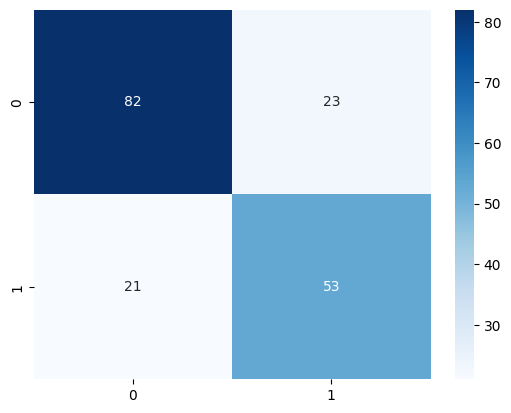

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d')

Result: The model performance is not so good, as the average accuracy is about 75%. But, the accuracy can be improve by hyper parameter tunning, by experimenting different parameters.